### Comparison between graph genomes with consensus genome

We constructed two modified linear UCD1.2 genome, `major_BSW` where we replaced reference bases with most frequent allele in Brown Swiss (BSW) population and `major-pan` where the major allele considered based on combined on four population (BSW,OBV,HOL, and FV). 

We compared the mapping statistics with the informative Brown Swiss graphs and original reference genome (see below). 

![Consensus genome design](methodpart3.png)

In [2]:
library("tidyverse")

#### Plot incorrect mapping - Paired end

File `../result/fp_comb.tsv` contained the *false positive* or incorrect mapping from all scenarios.

In [3]:
datroc <- read.table("../result/fp_comb.tsv",header=TRUE)
##split the mapping type and mapper
datroc2 <- cbind(datroc,as.data.frame(str_split_fixed(datroc$graph,"_",2)))
datroc2$V2 <- factor(datroc2$V2,levels = c("vg","bwa"))
colnames(datroc2)[4]  <- "map_type"
colnames(datroc2)[5]  <- "mapper"
head(datroc2)

mode,graph,FP,map_type,mapper
pe,BSW-graph_vg,0.07310000,BSW-graph,vg
pe,unmodified_bwa,0.10783977,unmodified,bwa
pe,major-BSW_bwa,0.09031428,major-BSW,bwa
pe,major-BSW_vg,0.08508020,major-BSW,vg
pe,major-pan_bwa,0.09530315,major-pan,bwa
pe,major-pan_vg,0.08864020,major-pan,vg


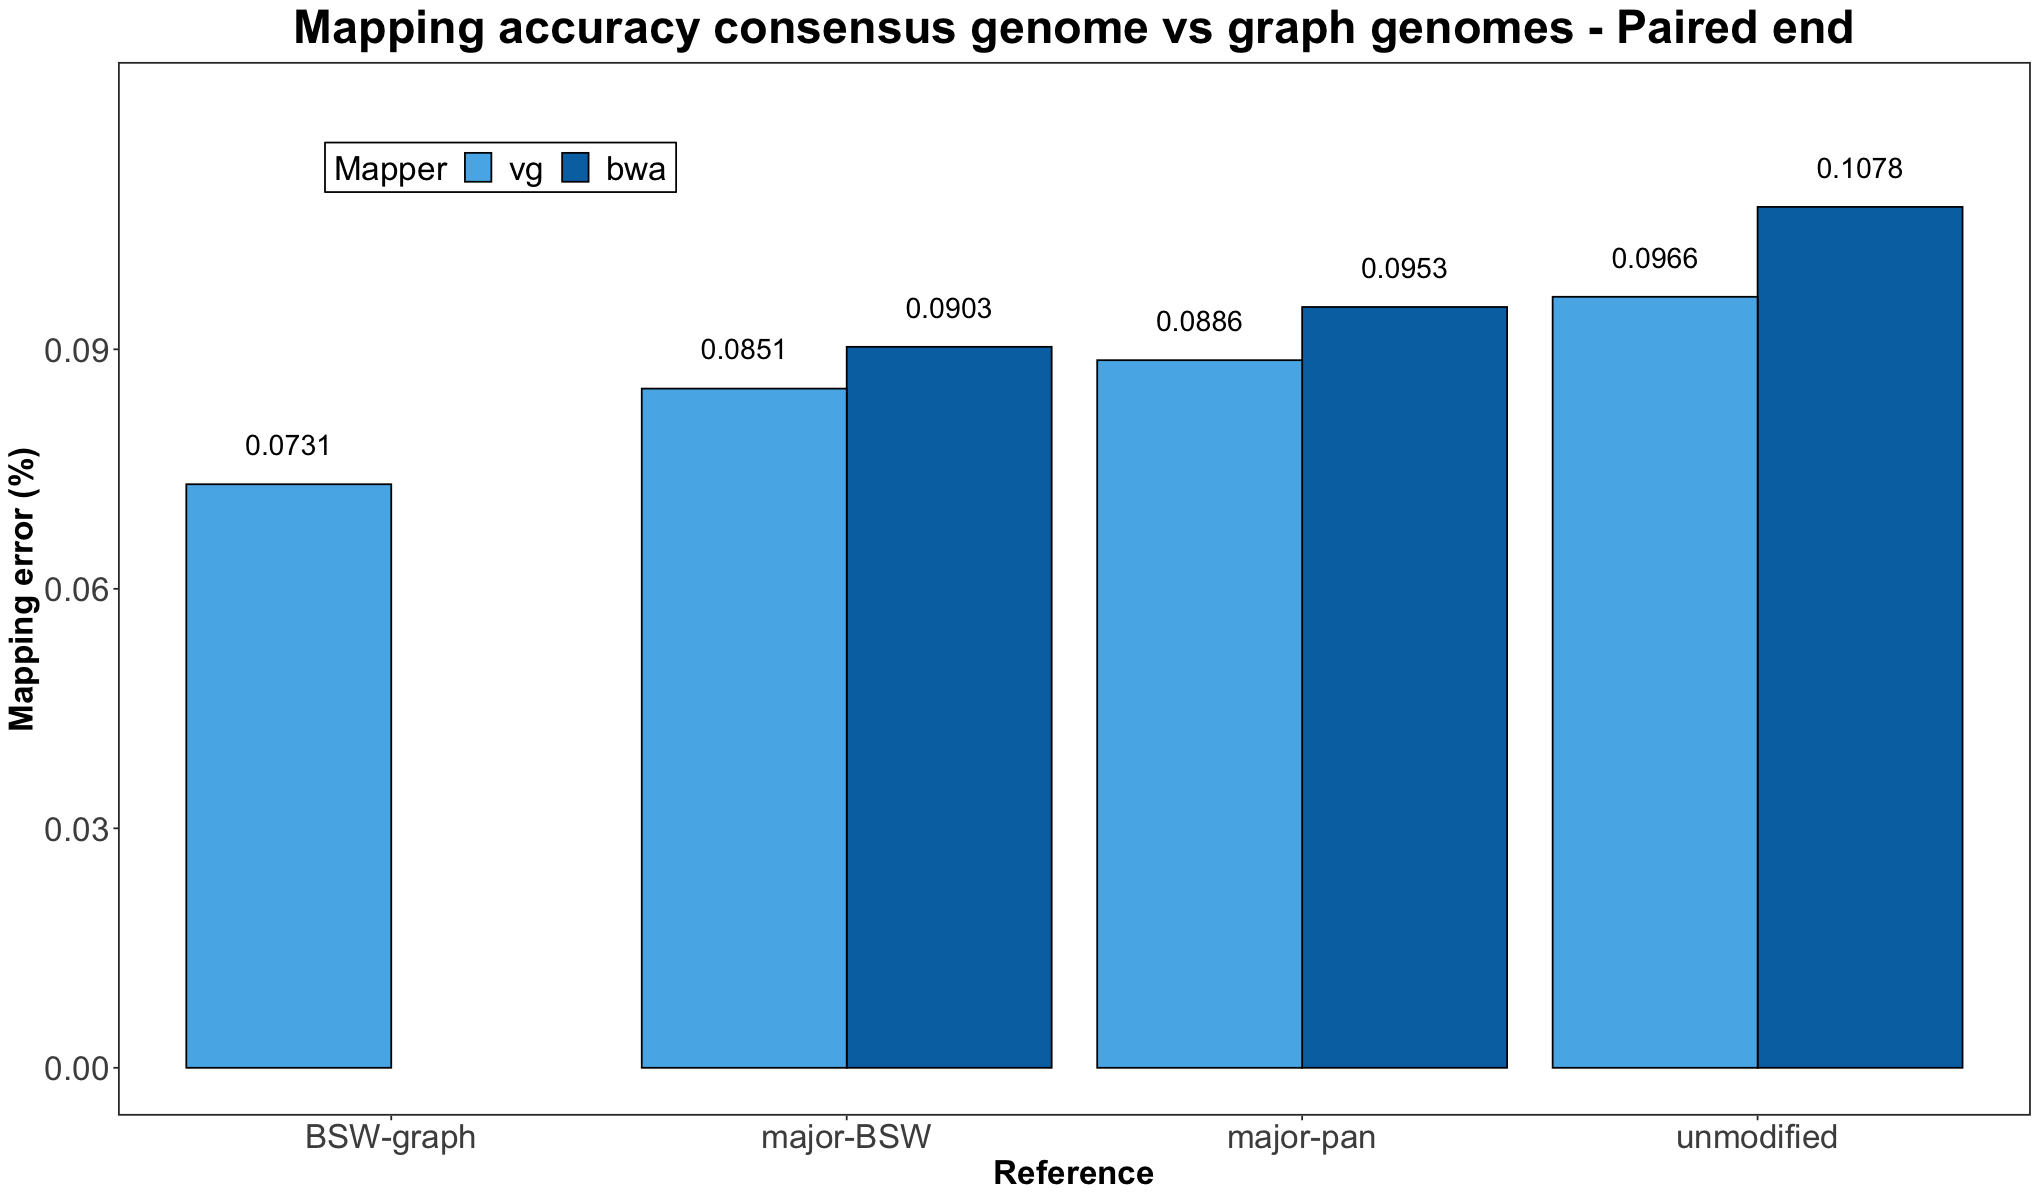

In [4]:
options(repr.plot.width=17, repr.plot.height=10)
options(warn=-1)
pbar_pe <- ggplot(data=datroc2 %>% filter(mode=="pe"),aes(x=map_type,y=FP,fill=mapper))+
  geom_col(position = "dodge",col="black",size=0.5)+
  scale_fill_manual(values=c("#56B4E9","#0072B2"))+
  scale_y_continuous(breaks=c(0,0.03,0.06,0.09),limits=c(0,0.12))+
  geom_text(aes(y=FP+0.005,label=round(FP,4)),position=position_dodge2(width=0.9),size=6)+
  theme_bw()+
  theme(legend.position = c(0.2,0.9),
        legend.background = element_rect(colour = "black"),
        legend.direction = "horizontal",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.text = element_text(size=20),
        axis.title = element_text(size=20,face = "bold"),
        legend.text = element_text(size=20),
        legend.title = element_text(size=20),
        panel.border = element_rect(size=1),
        plot.title=element_text(size=28,face="bold",hjust=0.5))+
  labs(x="Reference",y="Mapping error (%)",fill="Mapper", title="Mapping accuracy consensus genome vs graph genomes - Paired end")

pbar_pe

#### Plot incorrect mapping - Single end

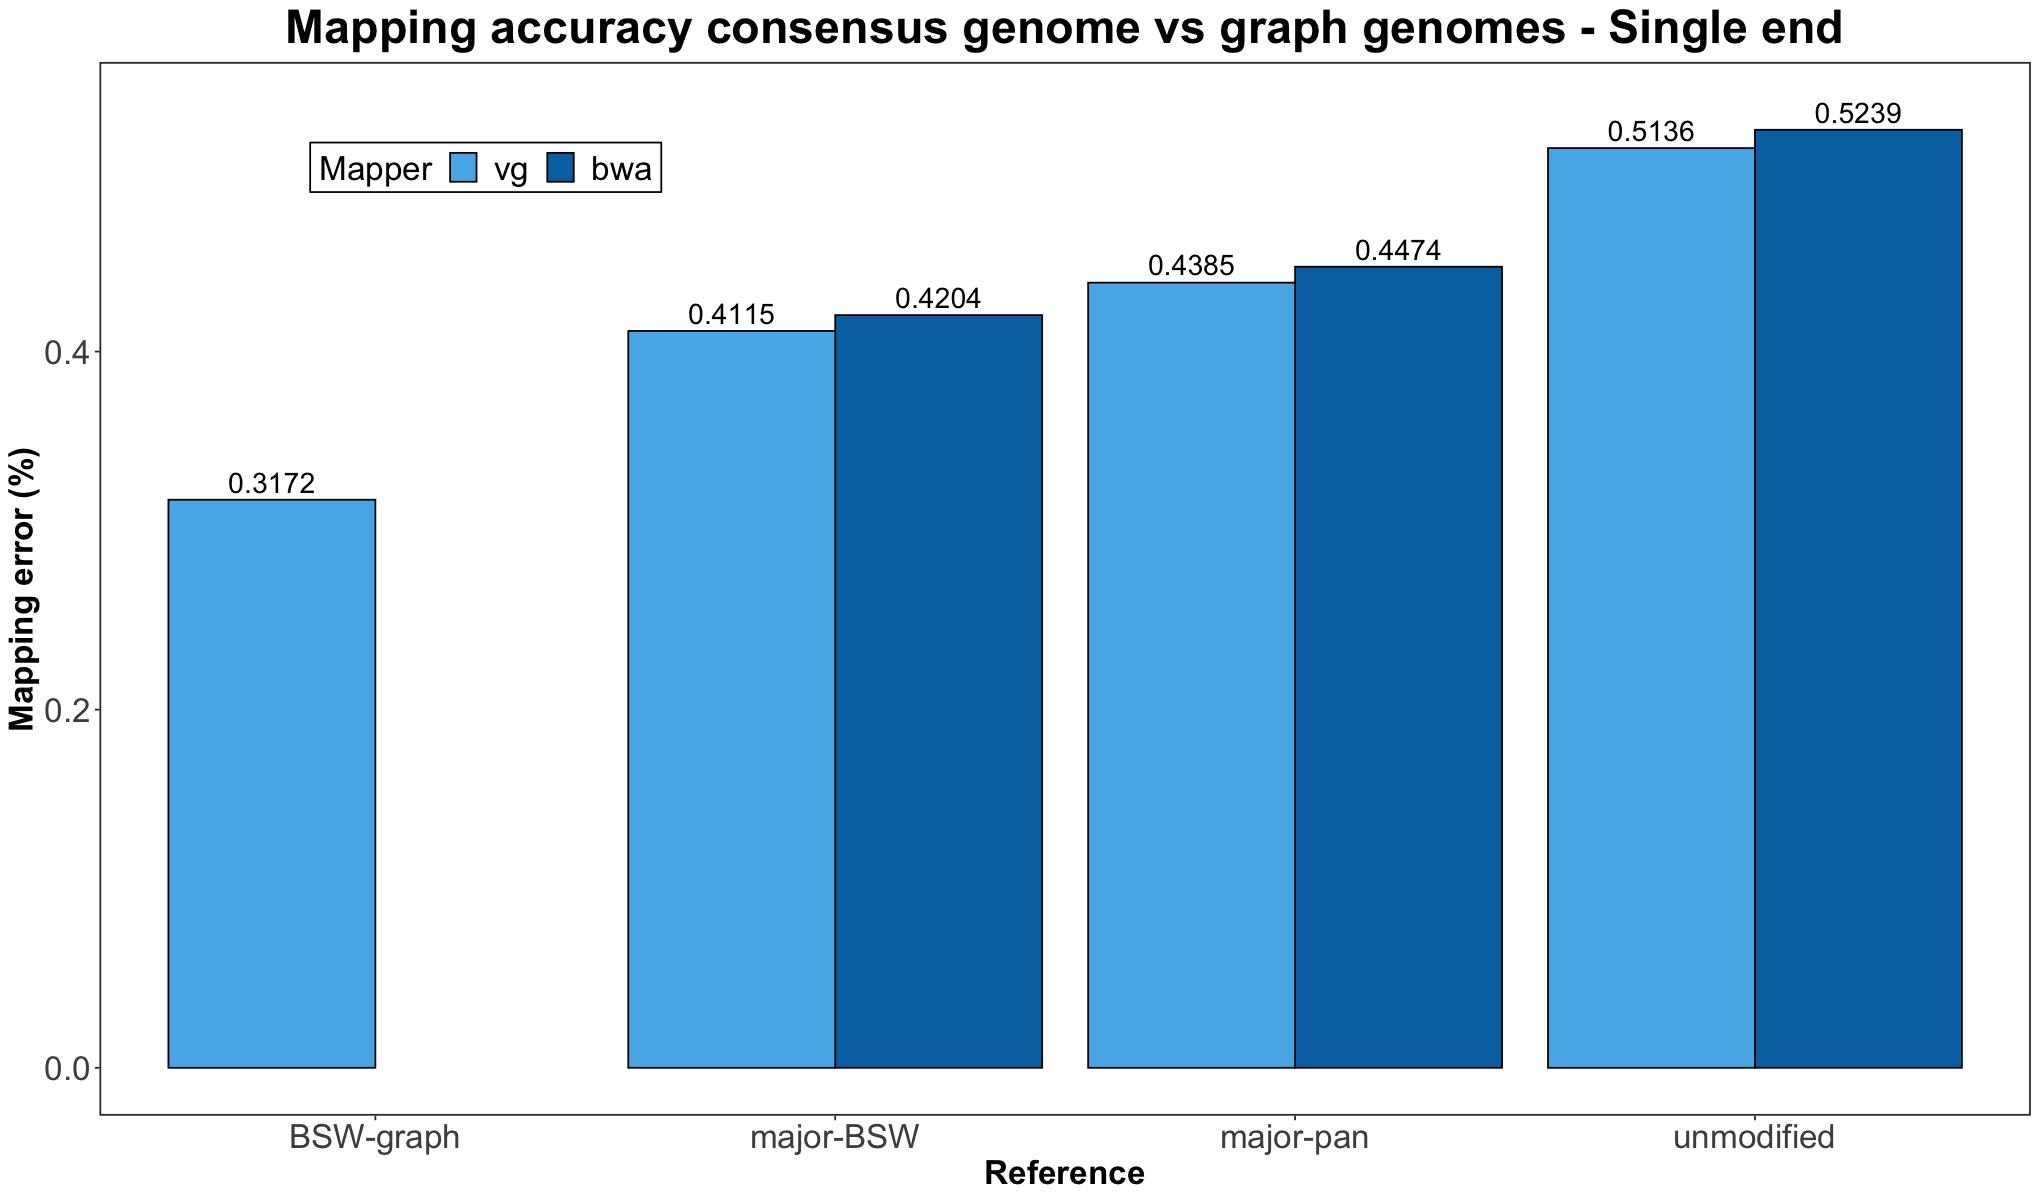

In [5]:
options(repr.plot.width=17, repr.plot.height=10)
pbar_se <- ggplot(data=datroc2 %>% filter(mode=="se"),aes(x=map_type,y=FP,fill=mapper))+
  geom_col(position = "dodge",col="black",size=0.5)+
  scale_fill_manual(values=c("#56B4E9","#0072B2"))+
  scale_y_continuous(limits=c(0,0.535))+
  geom_text(aes(y=FP+0.01,label=round(FP,4)),position=position_dodge2(width=0.9),size=6)+
  theme_bw()+
  theme(legend.position = c(0.2,0.9),
        legend.background = element_rect(colour = "black"),
        legend.direction = "horizontal",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.text = element_text(size=20),
        axis.title = element_text(size=20,face = "bold"),
        legend.text = element_text(size=20),
        legend.title = element_text(size=20),
        panel.border = element_rect(size=1),
        plot.title=element_text(size=28,face="bold",hjust=0.5))+
  labs(x="Reference",y="Mapping error (%)",fill="Mapper",title="Mapping accuracy consensus genome vs graph genomes - Single end")

pbar_se

### Plot relation between false positive- true positive -Paired end

File `roc_comb.tsv` contained information on incorrect mapping split by MQ.

In [6]:
datroc <- read.table("../result/roc_comb.tsv",header=TRUE)
head(datroc)

bin,mq,FP,total,TP,TP_sum,FP_sum,total_sum,FPR,TPR,mode,graph
"(50,60]",59.9859915,459,9873645,9873186,9873186,459,9873645,0.004589709,98.72561,pe,major-BSW_bwa
"(40,50]",45.9047413,71,55575,55504,9928690,530,9929220,0.005299665,99.28062,pe,major-BSW_bwa
"(30,40]",39.7935154,177,48546,48369,9977059,707,9977766,0.007069552,99.76427,pe,major-BSW_bwa
"(20,30]",25.4258701,406,7298,6892,9983951,1113,9985064,0.011129296,99.83319,pe,major-BSW_bwa
"(10,20]",16.6458037,167,1406,1239,9985190,1280,9986470,0.012799190,99.84558,pe,major-BSW_bwa
"[0,10]",0.6067923,7752,14163,6411,9991601,9032,10000633,0.090314283,99.90969,pe,major-BSW_bwa


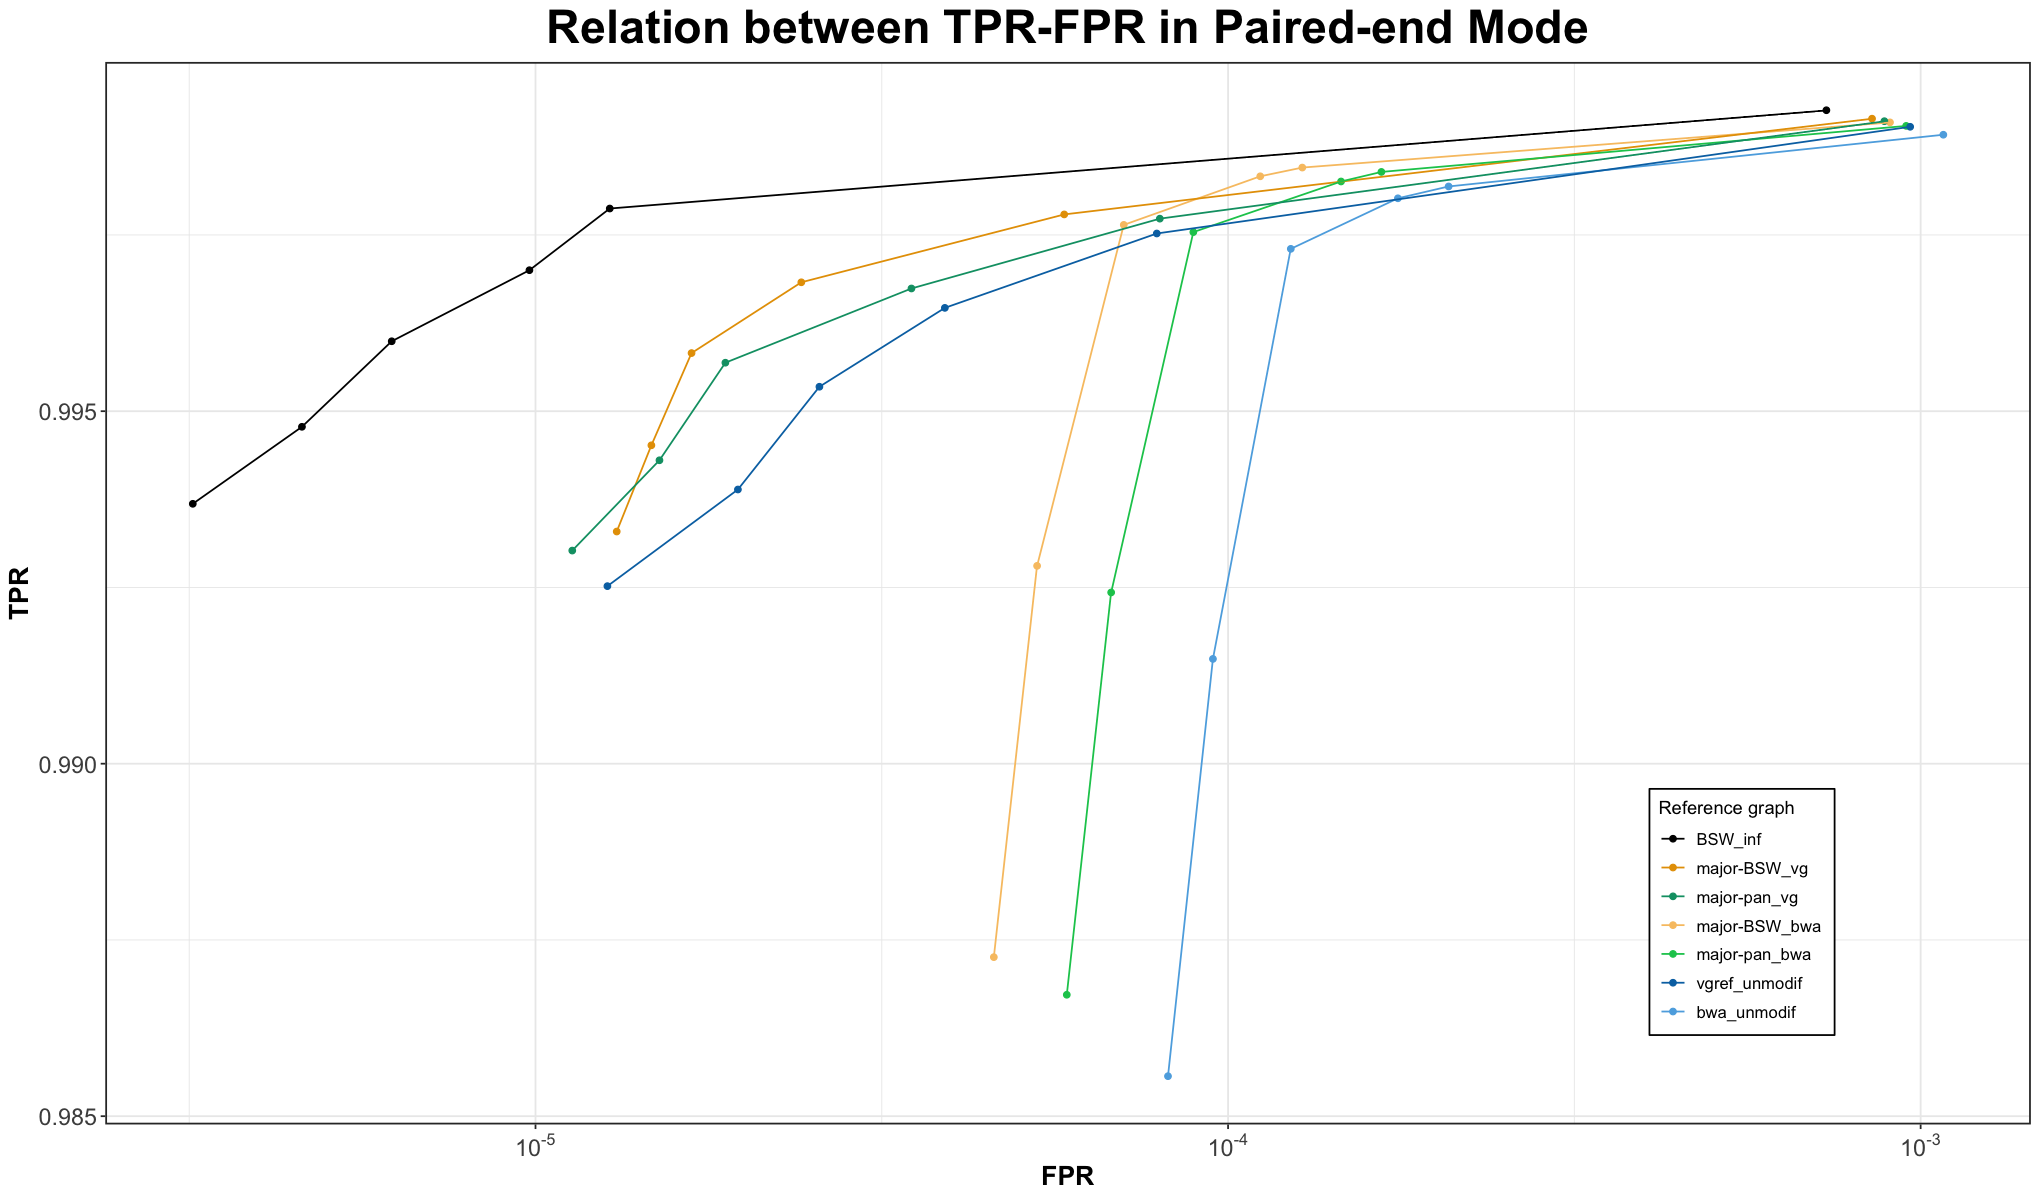

In [7]:
datroc_pe <- datroc %>% filter(mode=="pe")
proc_pe <- ggplot(datroc_pe,aes(x=FPR/100,y=TPR/100,col=fct_reorder2(graph,FPR,TPR),group=graph)) +
  geom_point()+
  geom_line()+
  scale_x_log10(breaks=c(10^-5,10^-4,10^-3,10^-2,10^-1,0),
                labels=scales::trans_format("log10",scales::math_format(10^.x)))+
  theme_bw()+
  theme(legend.position = c(0.85,0.2),
        legend.background = element_rect(colour = "black"),
        axis.text = element_text(size=14),
        axis.title = element_text(size=16,face = "bold"),
        legend.text = element_text(size=10),
        panel.border = element_rect(size=1),
        plot.title=element_text(size=28,face="bold",hjust=0.5))+
  scale_color_manual(values=c("#000000", "#E69F00", "#009E73","#F8C471",
                              "#0CC85B","#0072B2", "#5DADE2")) +
  labs(x="FPR",y="TPR",col="Reference graph",
      title="Relation between TPR-FPR in Paired-end Mode")
proc_pe

### Plot relation between false positive- true positive -Paired end

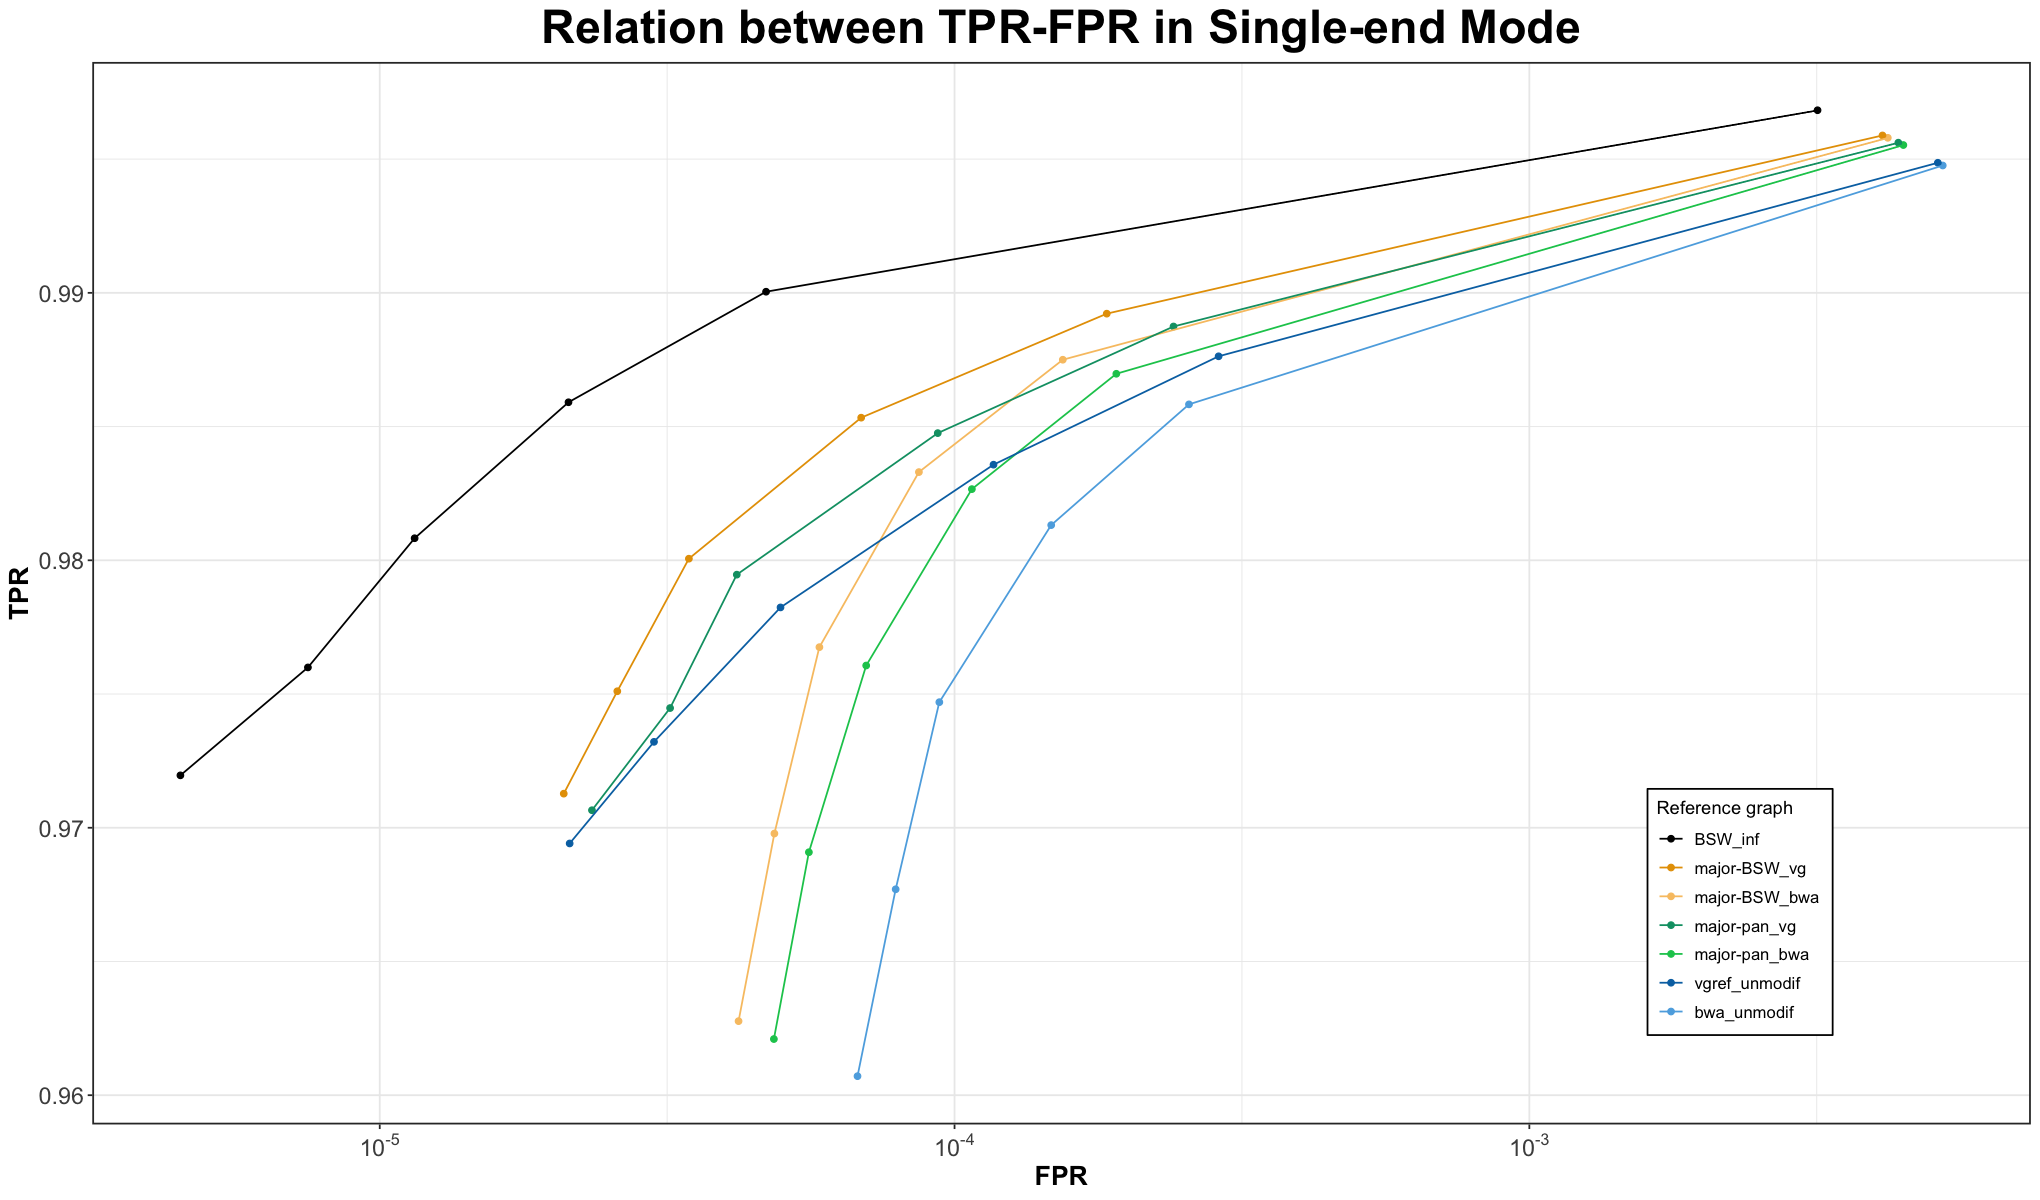

In [8]:
datroc_se <- datroc %>% filter(mode=="se")
proc_se <- ggplot(datroc_se,aes(x=FPR/100,y=TPR/100,col=fct_reorder2(graph,FPR,TPR),group=graph)) +
  geom_point()+
  geom_line()+
  scale_x_log10(breaks=c(10^-5,10^-4,10^-3,10^-2,10^-1,0),
                labels=scales::trans_format("log10",scales::math_format(10^.x)))+
  theme_bw()+
  theme(legend.position = c(0.85,0.2),
        legend.background = element_rect(colour = "black"),
        axis.text = element_text(size=14),
        axis.title = element_text(size=16,face = "bold"),
        legend.text = element_text(size=10),
        panel.border = element_rect(size=1),
        plot.title=element_text(size=28,face="bold",hjust=0.5))+
  scale_color_manual(values=c("#000000", "#E69F00", "#F8C471", "#009E73",
                              "#0CC85B","#0072B2", "#5DADE2")) +
  labs(x="FPR",y="TPR",col="Reference graph",
      title="Relation between TPR-FPR in Single-end Mode")
proc_se

In [9]:
sessionInfo()

R version 3.4.2 (2017-09-28)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.14

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] forcats_0.3.0   stringr_1.3.1   dplyr_0.8.3     purrr_0.2.5    
[5] readr_1.1.1     tidyr_1.0.0     tibble_2.1.1    ggplot2_3.2.0  
[9] tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1           cellranger_1.1.0     pillar_1.4.2        
 [4] compiler_3.4.2       tools_3.4.2          zeallot_0.1.0       
 [7] digest_0.6.15        uuid_0.1-2           lubridate_1.7.4     
[10] jsonlite_1.5         evaluate_0.14        lifecycle_0.1.0     
[13] nlme_3.1-131         gtable_0.2.0         lattice_0.20-35     
[16] pkgconf